In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Padding a 3D mesh

This notebook shows how to pad a 3D mesh.

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
(48, 120, 72)


<IPython.core.display.Javascript object>


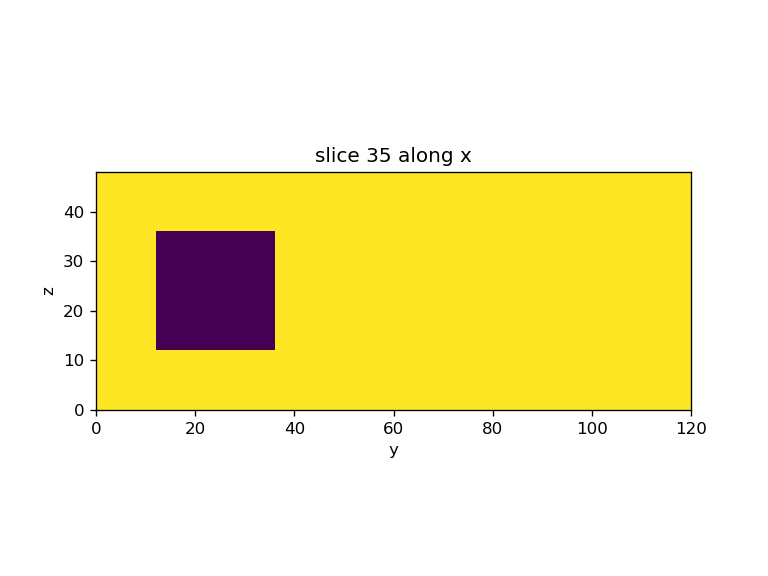

interactive(children=(IntSlider(value=35, description='index', max=71), RadioButtons(description='along', opti…

Generated contour with 14028 cells


In [2]:
import numpy as np
from nanomesh import Volume

n = 24
m = 12

data = np.ones([2*n, 5*n, 3*n], dtype=int)
data[m:3*m, m:3*m, 0:3*n] = 0

print(data.shape)

vol = Volume(data)
vol.show_slice()

# generate contours
from nanomesh.mesh3d import Mesher3D

mesher = Mesher3D(vol)
mesher.generate_contour()

contour = mesher.contour

### Padding a mesh

First step is to create a bounding box for the padded area (below).

In [3]:
import copy
from nanomesh.mesh_utils_3d import pad3d
from nanomesh.mesh3d import close_side, BoundingBox

pad_side = 'bottom'

contour2 = copy.copy(contour)
padded_mesh = pad3d(contour, side=pad_side, width=20, label=3)
padded_mesh.plot_itk()

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

### Generate tetrahedral mesh

In [4]:
# tetramesh
mesher.contour = padded_mesh
tetras = mesher.tetrahedralize(opts='-pAq1.2 -a100', generate_region_markers=True)
tetras.metadata['labels'] = tetras.metadata['tetgenRef']
tetras.plot_itk()

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…